<a href="https://colab.research.google.com/github/marcelogarret/reconpad/blob/main/aula3a_multiclasse_garret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [70]:
set(y)

{0, 1, 2}

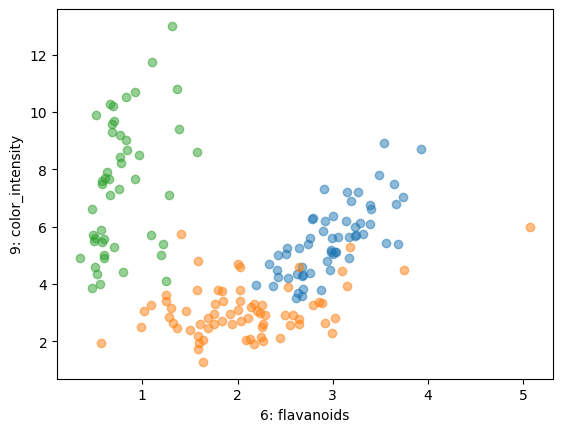

In [71]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [72]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [73]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [74]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.32083893e-04, 5.91278076e-05, 6.24656677e-05, 7.93933868e-05,
        6.43730164e-05]),
 'score_time': array([0.00221467, 0.00184655, 0.00145197, 0.00137186, 0.00132918]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[16,  0,  1],
       [ 2, 20,  3],
       [ 0,  8,  4]])

In [76]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6896675651392633

In [77]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [78]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.09434128e-04, 7.22408295e-05, 6.27040863e-05, 5.43594360e-05,
        5.12599945e-05]),
 'score_time': array([0.00344372, 0.00279331, 0.00219536, 0.00213075, 0.00210881]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [79]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.12771988e-04, 1.11579895e-04, 1.21831894e-04, 1.01327896e-04,
        9.46521759e-05]),
 'score_time': array([0.00948071, 0.00968051, 0.00662112, 0.00568056, 0.00498033]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [80]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.44720078e-04, 6.93798065e-05, 6.43730164e-05, 6.29425049e-05,
        6.15119934e-05, 6.00814819e-05, 8.51154327e-05, 6.29425049e-05,
        6.38961792e-05, 6.29425049e-05, 6.10351562e-05, 5.93662262e-05,
        5.74588776e-05, 5.67436218e-05, 5.60283661e-05, 6.07967377e-05,
        7.51018524e-05, 5.36441803e-05, 5.50746918e-05, 5.36441803e-05,
        5.34057617e-05, 5.57899475e-05, 9.58442688e-05, 6.86645508e-05,
        6.43730164e-05, 6.36577606e-05, 8.34465027e-05, 5.86509705e-05,
        5.81741333e-05, 6.48498535e-05, 5.48362732e-05, 5.93662262e-05,
        5.81741333e-05, 5.81741333e-05, 5.74588776e-05, 5.76972961e-05,
        7.08103180e-05, 5.55515289e-05, 7.46250153e-05, 5.34057617e-05,
        7.08103180e-05, 5.45978546e-05, 5.22136688e-05, 5.14984131e-05,
        5.03063202e-05, 5.07831573e-05, 5.05447388e-05, 5.48362732e-05,
        5.34057617e-05, 5.36441803e-05]),
 'score_time': array([0.00933814, 0.00477457, 0.00468969, 0.00475049, 0.0046432 ,


In [81]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelos['test_score']

array([0.58333333, 0.58333333, 0.61111111, 0.57142857, 0.28571429,
       0.55555556, 0.58333333, 0.66666667, 0.51428571, 0.45714286,
       0.75      , 0.38888889, 0.58333333, 0.68571429, 0.42857143,
       0.52777778, 0.55555556, 0.61111111, 0.54285714, 0.74285714,
       0.41666667, 0.5       , 0.63888889, 0.54285714, 0.4       ,
       0.47222222, 0.47222222, 0.61111111, 0.62857143, 0.62857143,
       0.63888889, 0.44444444, 0.55555556, 0.57142857, 0.71428571,
       0.72222222, 0.63888889, 0.63888889, 0.51428571, 0.71428571,
       0.63888889, 0.72222222, 0.55555556, 0.62857143, 0.51428571,
       0.66666667, 0.41666667, 0.61111111, 0.71428571, 0.48571429])

In [82]:
sum(modelos['test_score'])/50

0.572936507936508

In [83]:
modelo = modelos['estimator'][10]
modelos['test_score'][10]

0.75

In [84]:
modelo.intercept_

array([-148.,   88.,   26.])

In [85]:
modelo.coef_[:,[6,9]]

array([[ 250.25    , -753.359999],
       [ 326.14    , -632.879996],
       [-343.8     ,  905.339994]])

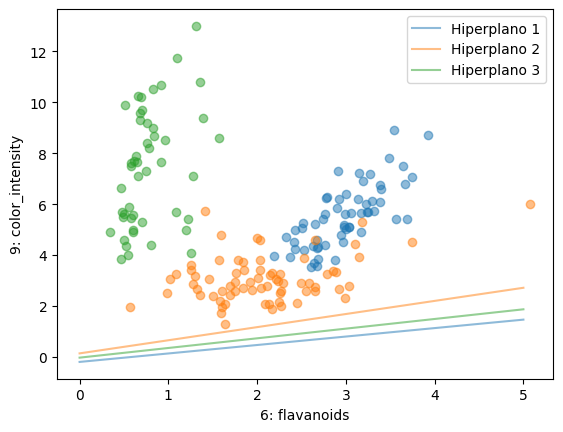

In [92]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.scatter(X[:,i][y==k], X[:,j][y==k], alpha=0.5)
  w = modelo.coef_[:,[i,j]][k] ## Selecionando os pesos definidos no modelo
  a = -w[0] / w[1] ## Definindo o coeficiente angular da reta que representa o hiperplano no gráfico 2D
  xx = np.linspace(0, 5) ## Gerando valores do eixo x dentro dos limites de 0 a 5
  yy = a * xx - (modelo.intercept_[k]) / w[1] ## Estimando os valores do eixo y para representação do hiperplano no gráfico 2D
  plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5) ## Plotando os hiperplanos

plt.legend()
plt.show()

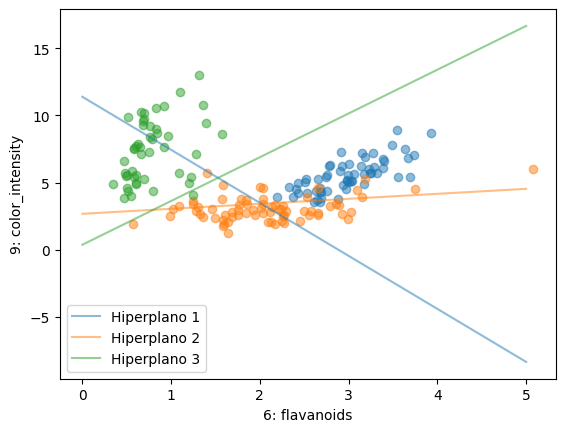

In [91]:
## !!!SOLUÇÃO ALTERNATIVA!!!
## Solução para o classificador linear considerando o dataset reduzido para apenas 2 características
from sklearn.datasets import load_wine
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados
i, j = 6, 9
X2, y2 = dataset.data[:, [i,j]], dataset.target

# Executar validação cruzada
modelos2 = cross_validate(Perceptron(), X2, y2,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)

# Selecionar um modelo treinado
modelo2 = modelos2['estimator'][10]

# Plotar os pontos e hiperplanos
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.scatter(X2[:,0][y==k], X2[:,1][y==k], alpha=0.5)
    w = modelo2.coef_[k] ## Selecionando os pesos definidos no modelo
    a = -w[0] / w[1] ## Definindo o coeficiente angular da reta que representa o hiperplano no gráfico 2D
    xx = np.linspace(0, 5) ## Gerando valores do eixo x dentro dos limites de 0 a 5
    yy = a * xx - (modelo2.intercept_[k]) / w[1] ## Estimando os valores do eixo y para representação do hiperplano no gráfico 2D
    plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5) ## Plotando os hiperplanos

plt.legend()
plt.show()
